In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.impute import KNNImputer

In [16]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
df=sns.load_dataset('titanic')
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [3]:
imputer = KNNImputer(n_neighbors=2)
df['age'] = imputer.fit_transform(df[['age']])



In [4]:
df['age'].isnull().sum()

0

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='age', ylabel='fare'>

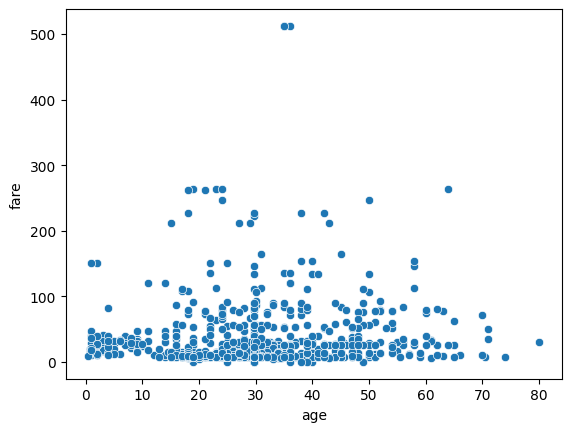

In [6]:
sns.scatterplot(data=df ,x='age', y='fare')

Scalers are useful for normalize the data point , like used to gather point close to line using a unit or scale from 0 to 1.

In [7]:
X=df[['age']]
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
y=df['fare']

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [9]:
model=LinearRegression()

In [10]:
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_predict=model.predict(X_test)

In [12]:
print(model.intercept_)
print(model.coef_)

21.965898830164228
[26.33173384]


Mean square error and r2 error are used to detect the residuals like , residual=predict-original

In [13]:
print('MSE =',mean_squared_error(y_test,y_predict))
print('r2 =',r2_score(y_test,y_predict))

MSE = 3054.8897554349437
r2 = 0.006059576412909329


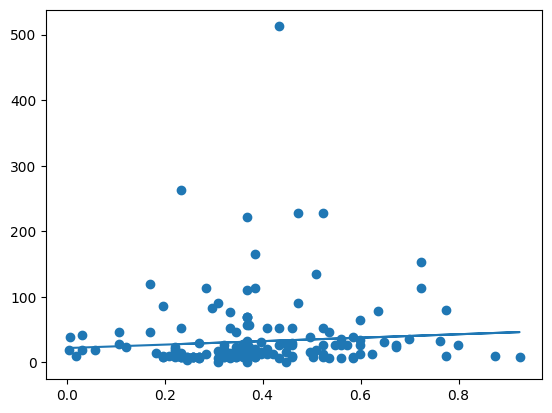

In [14]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_predict)
plt.show()

In [15]:
y_predict=model.predict([[89]])

print("the fare is:",y_predict)

the fare is: [2365.49021081]
